# 🧠 Handwritten Digits Classification with an MLP Neural Network

---

### **1. Project Goal**

The primary objective of this project is to build, train, and evaluate a Multi-Layer Perceptron (MLP) neural network to classify small (8x8 pixel) images of handwritten digits (0-9). This project serves as a foundational step in understanding the core concepts of deep learning.

---

### **2. Dataset Overview**

This project uses the **Digits dataset**, which is built into the `scikit-learn` library. Key features of this dataset include:
* **Total Samples:** 1,797
* **Features per Sample:** 64 (each 8x8 pixel image is flattened into a 64-element vector)
* **Number of Classes:** 10 (representing the digits 0 through 9)
* **Data Type:** The dataset is preprocessed and ready for modeling.

---

### **3. Implementation Methods**

This project was implemented using two distinct approaches to provide a comprehensive and comparative understanding.

#### **A. Using the Scikit-learn Library**
The first approach utilized the standard, optimized `MLPClassifier` class from `scikit-learn`. This serves as a baseline and represents the standard industry practice for applying MLP models quickly and effectively.

#### **B. From Scratch Implementation**
The second, more in-depth approach involved building the entire neural network from the ground up using only the `NumPy` library. This method provides deep insight into the internal mechanics of a neural network. The process is broken down into the following key steps:

**1. Parameter Initialization**
* The network's parameters (weights and biases) for a one-hidden-layer architecture were initialized.
* **Weights (`W1`, `W2`)** were initialized with small random numbers drawn from a normal distribution. This is crucial to "break symmetry" and ensure that neurons in the same layer learn different features.
* **Biases (`b1`, `b2`)** were initialized to zero, which is standard practice.

**2. The Feedforward Pass**
* This is the process of passing input data through the network to generate a prediction. For each layer, a linear calculation is followed by a non-linear activation.
* The sequence of operations is:
    1.  **Hidden Layer Input:** $Z_1 = X \cdot W_1 + b_1$
    2.  **Hidden Layer Output:** $A_1 = \text{ReLU}(Z_1)$
    3.  **Output Layer Input:** $Z_2 = A_1 \cdot W_2 + b_2$
    4.  **Final Probabilities:** $A_2 = \text{Softmax}(Z_2)$
* All intermediate values ($Z_1, A_1, Z_2$) are stored in a `cache` to be used during backpropagation.

**3. The Backpropagation Algorithm**
* This is the core of the learning process. The algorithm works backward from the final output to determine how much each parameter contributed to the overall error.
* Using the **chain rule** from calculus, it calculates the **gradient** (derivative) of the cost function with respect to each weight and bias. The key steps are:
    1.  **Compute Output Error ($dZ_2$):** Calculate the error between the predicted probabilities ($A_2$) and the true one-hot encoded labels.
    2.  **Compute Layer 2 Gradients ($dW_2, db_2$):** Use the output error ($dZ_2$) to find the gradients for the second layer's parameters.
    3.  **Propagate Error to Hidden Layer ($dZ_1$):** Propagate the error backward to the hidden layer by multiplying it by the second layer's weights ($W_2$).
    4.  **Compute Layer 1 Gradients ($dW_1, db_1$):** Use the hidden layer error ($dZ_1$) to find the gradients for the first layer's parameters.

**4. The Parameter Update**
* Once the gradients are calculated, the final step in the training loop is to update the parameters using Gradient Descent.
* The update rule is applied to each parameter:
    > $parameter = parameter - \text{learning\_rate} \times \text{gradient}$
* This step nudges the parameters in the direction that minimizes the cost function, making the network's predictions slightly more accurate with each iteration.

---

### **4. Key Concepts Covered**
* Multi-Layer Perceptron (MLP) Architecture
* Feedforward Propagation
* Backpropagation Algorithm
* Activation Functions (ReLU & Softmax)
* Cost Function (Categorical Cross-Entropy)
* Gradient Descent Optimization
* Feature Scaling (`StandardScaler`)
* One-Hot Encoding for multi-class labels

---

### **5. Final Result**
Both the from-scratch implementation and the Scikit-learn model successfully learned to classify the handwritten digits, achieving a high accuracy of over **97%** on the unseen test data. This result validates the correctness of the manual implementation and demonstrates the power of neural networks for image classification tasks.

Data loaded for visualization.
Shape of data (X): (1797, 64)

Displaying first 15 digit images...


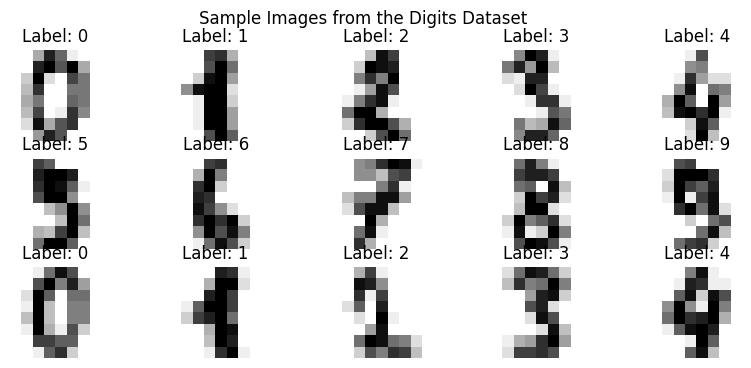


Performing t-SNE dimensionality reduction... (This may take a moment)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE complete. Plotting the results...


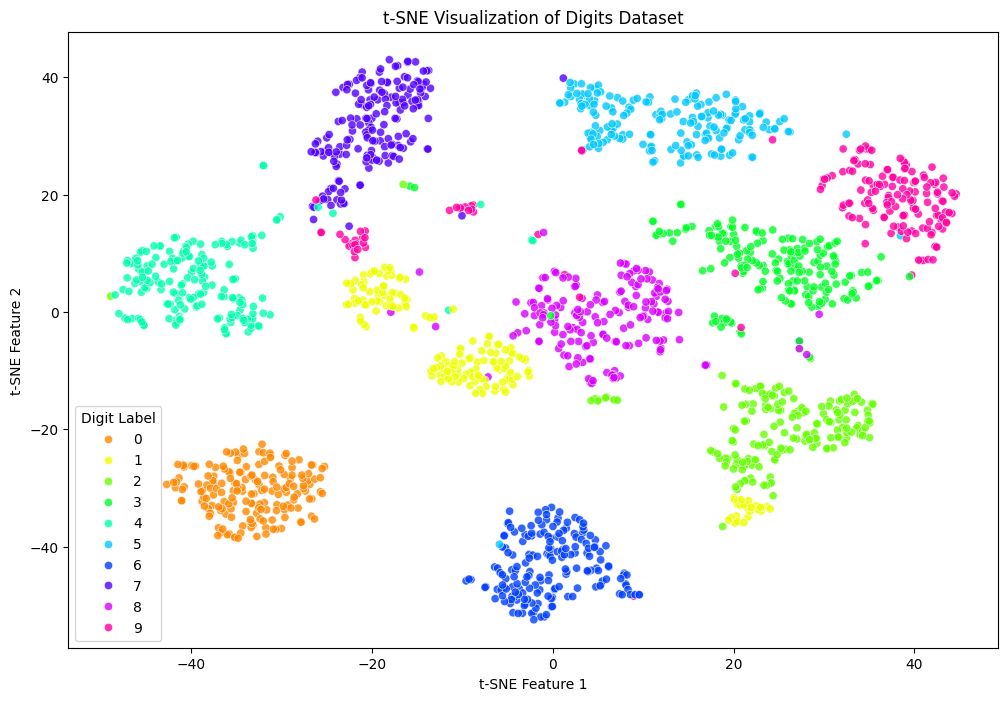

In [16]:

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
import pandas as pd

digits = load_digits()
X, y = digits.data, digits.target

print("Data loaded for visualization.")
print(f"Shape of data (X): {X.shape}")



print("\nDisplaying first 15 digit images...")
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(X[:15], y[:15])):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')

plt.suptitle("Sample Images from the Digits Dataset")
plt.show()



print("\nPerforming t-SNE dimensionality reduction... (This may take a moment)")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

X_tsne = tsne.fit_transform(X_scaled)

print("t-SNE complete. Plotting the results...")

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = y

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="TSNE1", y="TSNE2",
    hue="label",
    palette=sns.color_palette("hsv", 10),
    data=df_tsne,
    legend="full",
    alpha=0.8
)
plt.title('t-SNE Visualization of Digits Dataset')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(title='Digit Label')
plt.show()

In [17]:

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot = encoder.fit_transform(y_train_reshaped)
y_test_one_hot = encoder.transform(y_test_reshaped)


print("--- Data Preparation Complete ---")
print(f"Shape of scaled X_train: {X_train_scaled.shape}")
print(f"Shape of one-hot encoded y_train: {y_train_one_hot.shape}")

print(f"\nOriginal label for first sample: {y_train[0]}")
print(f"One-hot encoded label for first sample: \n{y_train_one_hot[0]}")

--- Data Preparation Complete ---
Shape of scaled X_train: (1437, 64)
Shape of one-hot encoded y_train: (1437, 10)

Original label for first sample: 6
One-hot encoded label for first sample: 
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [18]:

def initialize_parameters(input_size, hidden_size, output_size):
  
    np.random.seed(42) 
    
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    
    b1 = np.zeros((1, hidden_size))
    b2 = np.zeros((1, output_size))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

input_layer_size = X_train_scaled.shape[1]
hidden_layer_size = 128
output_layer_size = y_train_one_hot.shape[1]

params = initialize_parameters(input_layer_size, hidden_layer_size, output_layer_size)

print("--- Parameter Initialization Complete ---")
print("Shape of W1:", params["W1"].shape)
print("Shape of b1:", params["b1"].shape)
print("Shape of W2:", params["W2"].shape)
print("Shape of b2:", params["b2"].shape)

--- Parameter Initialization Complete ---
Shape of W1: (64, 128)
Shape of b1: (1, 128)
Shape of W2: (128, 10)
Shape of b2: (1, 10)


In [19]:
def relu(Z):
  
    return np.maximum(0, Z)

def relu_derivative(Z):
   
    dZ = np.where(Z > 0, 1, 0)
    return dZ

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    
    probabilities = expZ / np.sum(expZ, axis=1, keepdims=True)
    
    return probabilities

np.random.seed(0)
z_test = np.random.randn(2, 4) 
a_relu = relu(z_test)
print("--- ReLU Test ---")
print("Original Z:\n", z_test)
print("ReLU Activated A:\n", a_relu)
a_softmax = softmax(z_test)
print("\n--- Softmax Test ---")
print("Original Z:\n", z_test)
print("Softmax Probabilities A:\n", a_softmax)
print("Sum of probabilities for each sample:", np.sum(a_softmax, axis=1))


--- ReLU Test ---
Original Z:
 [[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]]
ReLU Activated A:
 [[1.76405235 0.40015721 0.97873798 2.2408932 ]
 [1.86755799 0.         0.95008842 0.        ]]

--- Softmax Test ---
Original Z:
 [[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]]
Softmax Probabilities A:
 [[0.30096764 0.07694629 0.13723412 0.48485195]
 [0.62874417 0.03655758 0.25120137 0.08349688]]
Sum of probabilities for each sample: [1. 1.]


In [20]:

def feedforward(X, parameters):
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2
    }
    
    return A2, cache

A2_test, cache_test = feedforward(X_train_scaled, params)

print("--- Feedforward Pass Complete ---")
print("Shape of final output probabilities (A2):", A2_test.shape)
print("\nExample output probabilities for the first sample (sum should be 1):")
print(A2_test[0])
print("Sum of probabilities for the first sample:", np.sum(A2_test[0]))

print("\nKeys in the cache dictionary:", cache_test.keys())

--- Feedforward Pass Complete ---
Shape of final output probabilities (A2): (1437, 10)

Example output probabilities for the first sample (sum should be 1):
[0.10049324 0.09949894 0.09975424 0.09877819 0.1016143  0.10077693
 0.0993685  0.10009388 0.09929029 0.10033148]
Sum of probabilities for the first sample: 1.0

Keys in the cache dictionary: dict_keys(['Z1', 'A1', 'Z2'])


In [22]:

def backpropagation(X, y_one_hot, parameters, cache):
    
    m = X.shape[0]
    
    W2 = parameters["W2"]
    A1 = cache["A1"]
    
    final_probs = softmax(cache["Z2"])

    dZ2 = final_probs - y_one_hot
    
    dW2 = (1 / m) * (A1.T @ dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(cache["Z1"])
    
    dW1 = (1 / m) * (X.T @ dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grads


grads = backpropagation(X_train_scaled, y_train_one_hot, params, cache_test)

print("--- Backpropagation Pass Complete ---")
print("Shape of dW1:", grads["dW1"].shape)
print("Shape of db1:", grads["db1"].shape)
print("Shape of dW2:", grads["dW2"].shape)
print("Shape of db2:", grads["db2"].shape)


--- Backpropagation Pass Complete ---
Shape of dW1: (64, 128)
Shape of db1: (1, 128)
Shape of dW2: (128, 10)
Shape of db2: (1, 10)


In [23]:

def update_parameters(parameters, grads, learning_rate):
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    updated_parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return updated_parameters

print("--- Testing the Update Function ---")
print("Original W1 (first row, first element):", params['W1'][0, 0])

updated_params = update_parameters(params, grads, learning_rate=0.01)

print("Updated W1 (first row, first element):", updated_params['W1'][0, 0])
print("\nNotice the value has changed slightly in the direction dictated by the gradient.")

--- Testing the Update Function ---
Original W1 (first row, first element): 0.004967141530112327
Updated W1 (first row, first element): 0.004967141530112327

Notice the value has changed slightly in the direction dictated by the gradient.


In [33]:

def nn_model(X_train, y_train, hidden_size, iterations, learning_rate):
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    
    cost_history = []
    
    print("Starting training...")
    for i in range(iterations):
        A2, cache = feedforward(X_train, parameters)
        
        grads = backpropagation(X_train, y_train, parameters, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            cost = compute_cost(A2, y_train, parameters) 
            cost_history.append(cost)
            print(f"Cost after iteration {i}: {cost:.4f}")
            
    print("Training complete!")
    return parameters, cost_history

def compute_cost(A2, Y, parameters):
    m = Y.shape[0]
    logprobs = -np.sum(Y * np.log(A2 + 1e-8))
    cost = (1.0 / m) * logprobs
    return cost

hidden_layer_size = 128
num_iterations = 3000
learning_rate_alpha = 0.5

trained_parameters, final_cost_history = nn_model(
    X_train_scaled, 
    y_train_one_hot, 
    hidden_layer_size, 
    num_iterations, 
    learning_rate_alpha
)

Starting training...
Cost after iteration 0: 2.3026
Cost after iteration 100: 0.0672
Cost after iteration 200: 0.0276
Cost after iteration 300: 0.0156
Cost after iteration 400: 0.0104
Cost after iteration 500: 0.0075
Cost after iteration 600: 0.0058
Cost after iteration 700: 0.0047
Cost after iteration 800: 0.0039
Cost after iteration 900: 0.0033
Cost after iteration 1000: 0.0029
Cost after iteration 1100: 0.0025
Cost after iteration 1200: 0.0023
Cost after iteration 1300: 0.0020
Cost after iteration 1400: 0.0019
Cost after iteration 1500: 0.0017
Cost after iteration 1600: 0.0016
Cost after iteration 1700: 0.0014
Cost after iteration 1800: 0.0013
Cost after iteration 1900: 0.0012
Cost after iteration 2000: 0.0012
Cost after iteration 2100: 0.0011
Cost after iteration 2200: 0.0010
Cost after iteration 2300: 0.0010
Cost after iteration 2400: 0.0009
Cost after iteration 2500: 0.0009
Cost after iteration 2600: 0.0008
Cost after iteration 2700: 0.0008
Cost after iteration 2800: 0.0008
Cost 


--- Final Model Evaluation on Test Set ---
Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



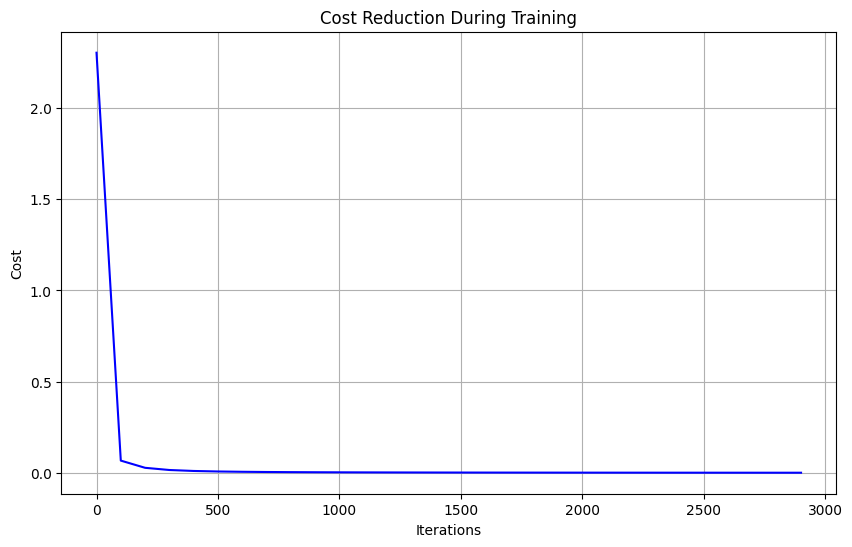

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def predict(X, parameters):

    A2, _ = feedforward(X, parameters)
    predictions = np.argmax(A2, axis=1)
    return predictions

y_pred_test = predict(X_test_scaled, trained_parameters)

accuracy = accuracy_score(y_test, y_pred_test)
print("\n--- Final Model Evaluation on Test Set ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


plt.figure(figsize=(10, 6))
iterations_points = range(0, num_iterations, 100)
plt.plot(iterations_points, final_cost_history, 'b-')
plt.title("Cost Reduction During Training")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

In [35]:

from sklearn.neural_network import MLPClassifier

print("--- Building and Training the Scikit-learn MLP Classifier ---")

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128,),   
    activation='relu',         
    solver='adam',
    alpha=0.0001,
    max_iter=1000,
    random_state=42,
    verbose=True,
    learning_rate_init=0.001
)

mlp_model.fit(X_train_scaled, y_train)

print("\nModel training complete!")

--- Building and Training the Scikit-learn MLP Classifier ---
Iteration 1, loss = 2.21906905
Iteration 2, loss = 1.67569676
Iteration 3, loss = 1.26807500
Iteration 4, loss = 0.97126469
Iteration 5, loss = 0.75888505
Iteration 6, loss = 0.61057494
Iteration 7, loss = 0.50439459
Iteration 8, loss = 0.42504042
Iteration 9, loss = 0.36564872
Iteration 10, loss = 0.32014593
Iteration 11, loss = 0.28336936
Iteration 12, loss = 0.25382149
Iteration 13, loss = 0.22931770
Iteration 14, loss = 0.20883157
Iteration 15, loss = 0.19124101
Iteration 16, loss = 0.17598173
Iteration 17, loss = 0.16243532
Iteration 18, loss = 0.15093378
Iteration 19, loss = 0.14034569
Iteration 20, loss = 0.13099565
Iteration 21, loss = 0.12262286
Iteration 22, loss = 0.11516597
Iteration 23, loss = 0.10826405
Iteration 24, loss = 0.10199987
Iteration 25, loss = 0.09613120
Iteration 26, loss = 0.09099815
Iteration 27, loss = 0.08603253
Iteration 28, loss = 0.08148225
Iteration 29, loss = 0.07700119
Iteration 30, loss 


--- Evaluating the Scikit-learn Model on the Test Set ---
Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      0.97      0.97        33
           3       0.97      0.94      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.94      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.94      1.00      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



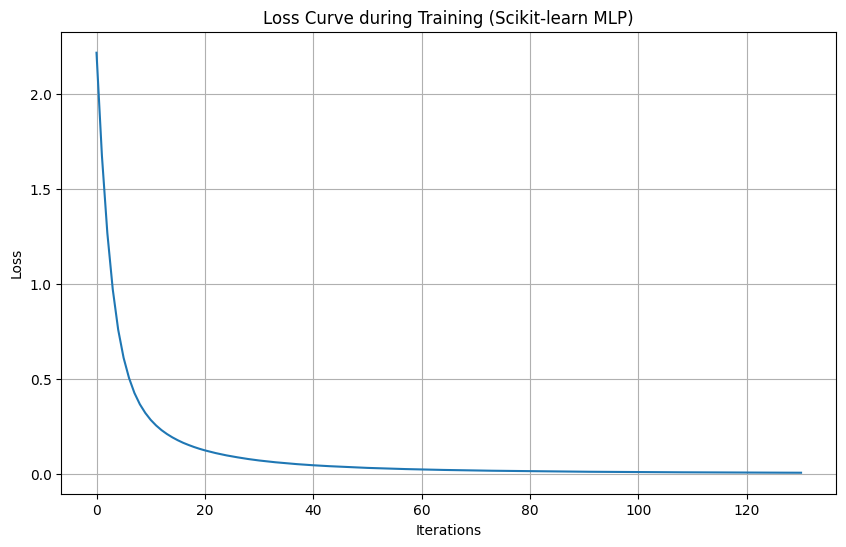

In [36]:

print("\n--- Evaluating the Scikit-learn Model on the Test Set ---")

y_pred = mlp_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_)
plt.title("Loss Curve during Training (Scikit-learn MLP)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()